# KNN - App reviews

Importamos librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Mostrar las gráficas en el notebook
%matplotlib inline     
plt.rcParams['figure.figsize'] = (16, 9)    # Cambiar el tamaño de las gráficas
plt.style.use('ggplot')                      # Seleccionar un estilo de gráfica

Cargamos archivo a analizar

In [5]:
dataframe = pd.read_csv(r"./datasets/reviews_sentiment.csv", sep=';')
dataframe.head(10)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,positive,negative,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de …,pero la app es muy buena",23,positive,negative,1,-0.726825
7,Muy buena,"Estaba más acostumbrado al otro diseño, pero e...",16,positive,negative,1,-0.736769
8,Ta to guapa.,Va de escándalo,21,positive,negative,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el diseño es ...,13,negative,negative,1,-0.797961


In [6]:
dataframe.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


La columna Star Rating es la que se va a predecir y refleja la calificación que le dieron a un producto. 

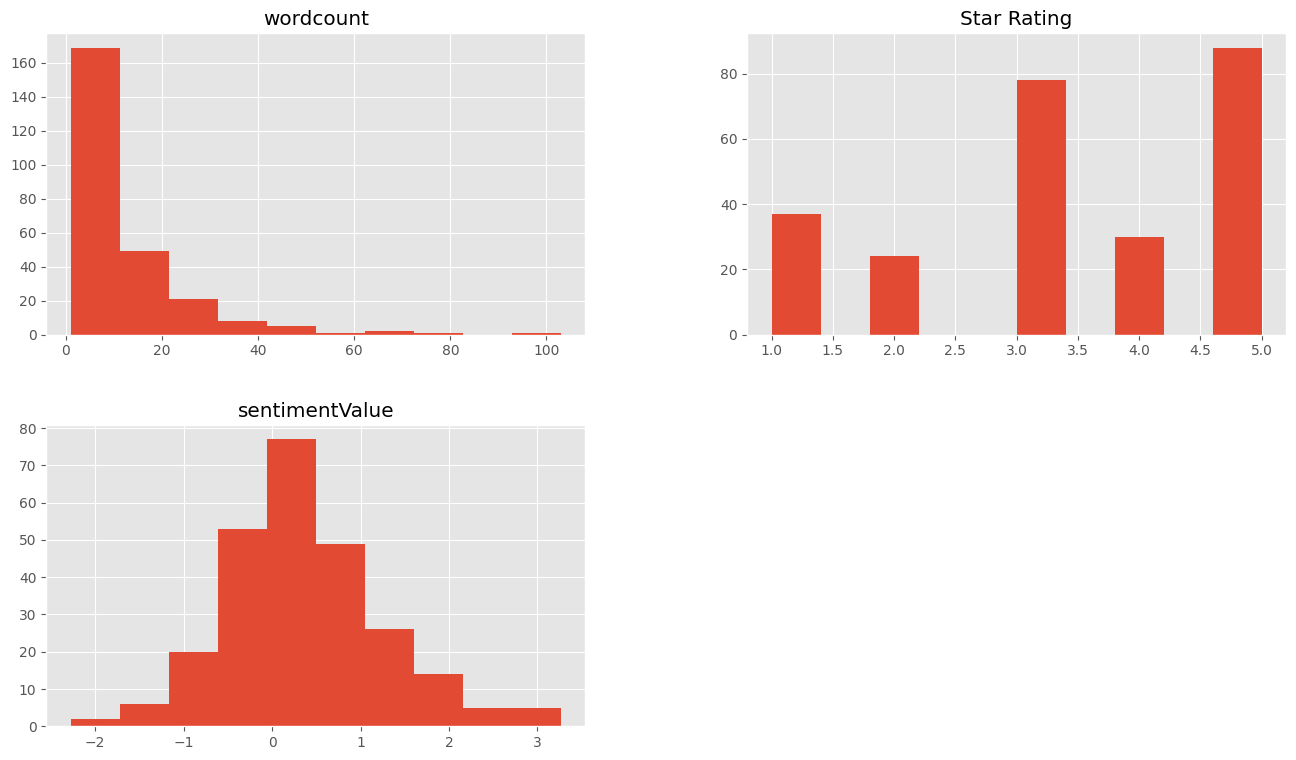

In [8]:
dataframe.hist()
plt.show()

Vemos que la distribución de “estrellas” no está balanceada… esto no es bueno. Convendría tener las mismas cantidades en las salidas, para no tener resultados “tendenciosos”. Para este ejercicio lo dejaremos así, pero en la vida real, debemos equilibrarlos. La gráfica de Valores de Sentimientos parece bastante una campana movida levemente hacia la derecha del cero y la cantidad de palabras se centra sobre todo de 0 a 10.

Veamos realmente cuantas Valoraciones de Estrellas tenemos:

In [9]:
print(dataframe.groupby('Star Rating').size())

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64


Con eso confirmamos que hay sobre todo de 3 y 5 estrellas.

Ahora, otra gráfica más explicativa:

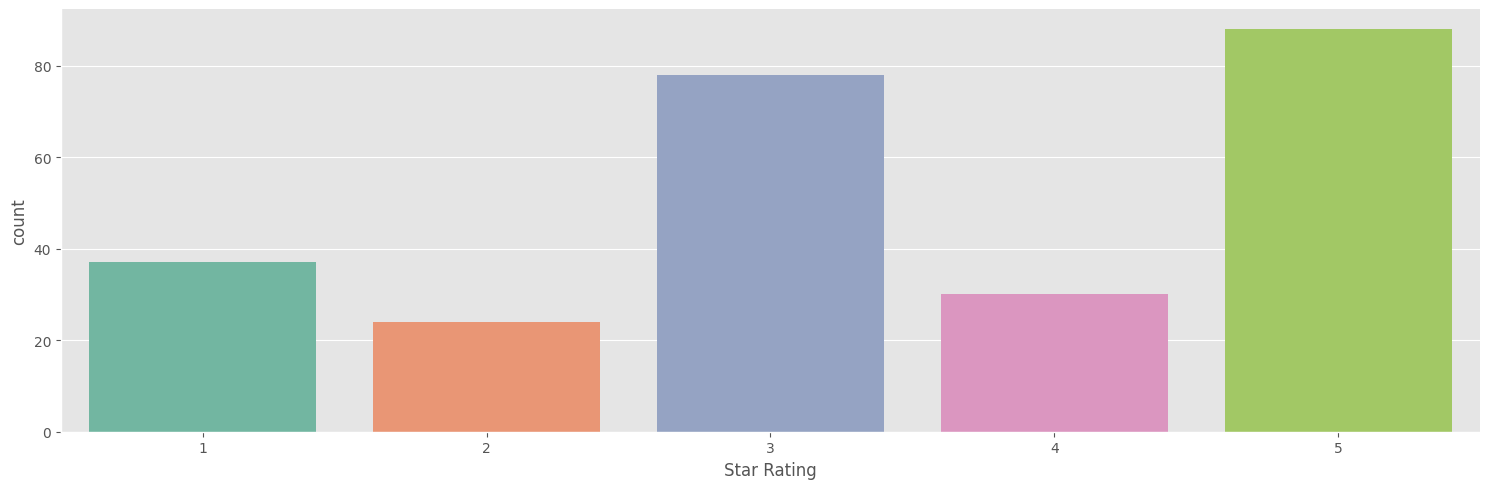

In [20]:
sns.catplot(x="Star Rating", hue="Star Rating", data=dataframe, kind="count", aspect=3, palette="Set2", legend=False)


Graficamos mejor la cantidad de palabras y confirmamos que la mayoría están entre 1 y 10 palabras.

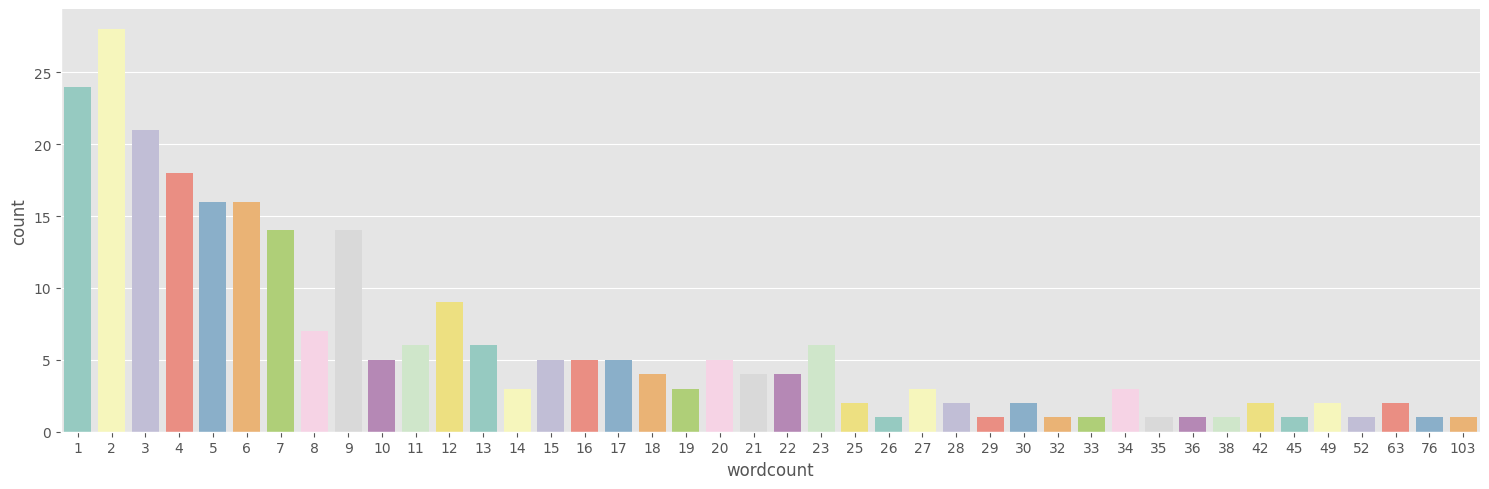

In [19]:

sns.catplot(x='wordcount',hue="wordcount",palette="Set3",data=dataframe,kind="count", aspect=3,legend=False)

### Preparamos las entradas
Creamos nuestro conjunto X (características) e y (target) de entrada y los conjuntos de train y test.

In [21]:
X = dataframe[['wordcount','sentimentValue']].values
y = dataframe['Star Rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### k-Nearest Neighbor con Scikit Learn
Definimos el valor de k en 7 (se verá como más adelante) y creamos nuestro clasificador.

In [22]:
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.86


Vemos que la precisión que nos da es de 90% en el set de entrenamiento y del 86% para el de test.

NOTA: como se observa, utilizamos la clase *KNeighborsClassifier* de SciKit Learn puesto que nuestras etiquetas son valores discretos (estrellas del 1 al 5). Pero  también existe la clase *KneighborsRegressor* para etiquetas con valores continuos.

### Precisión del modelo
Evaluamos la precisión viendo la matriz de confusión y el informme sobre el conjunto de test:

In [23]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65



Cómo se ve la puntuación F1 es del 87%, bastante buena.    
NOTA: debemos recordar que este es sólo un ejercicio para aprender y se dispone de MUY pocos registros totales y también en el conjunto de test. Por ejemplo de 2 estrellas sólo tiene 1 valoración y esto es evidentemente insuficiente.

Ahora realizaremos la gráfica con la clasificación obtenida, la que nos ayuda a ver fácilmente en donde caerán las predicciones.   

NOTA: al ser 2 características, es posible hacer la gráfica 2D (si fueran 3 podría ser en 3D). Pero para usos reales, podríamos tener  más de 3 dimensiones y no sería necesario visualizarlo. Sólo nos quedaríamos con el resultado del algoritmo.

/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


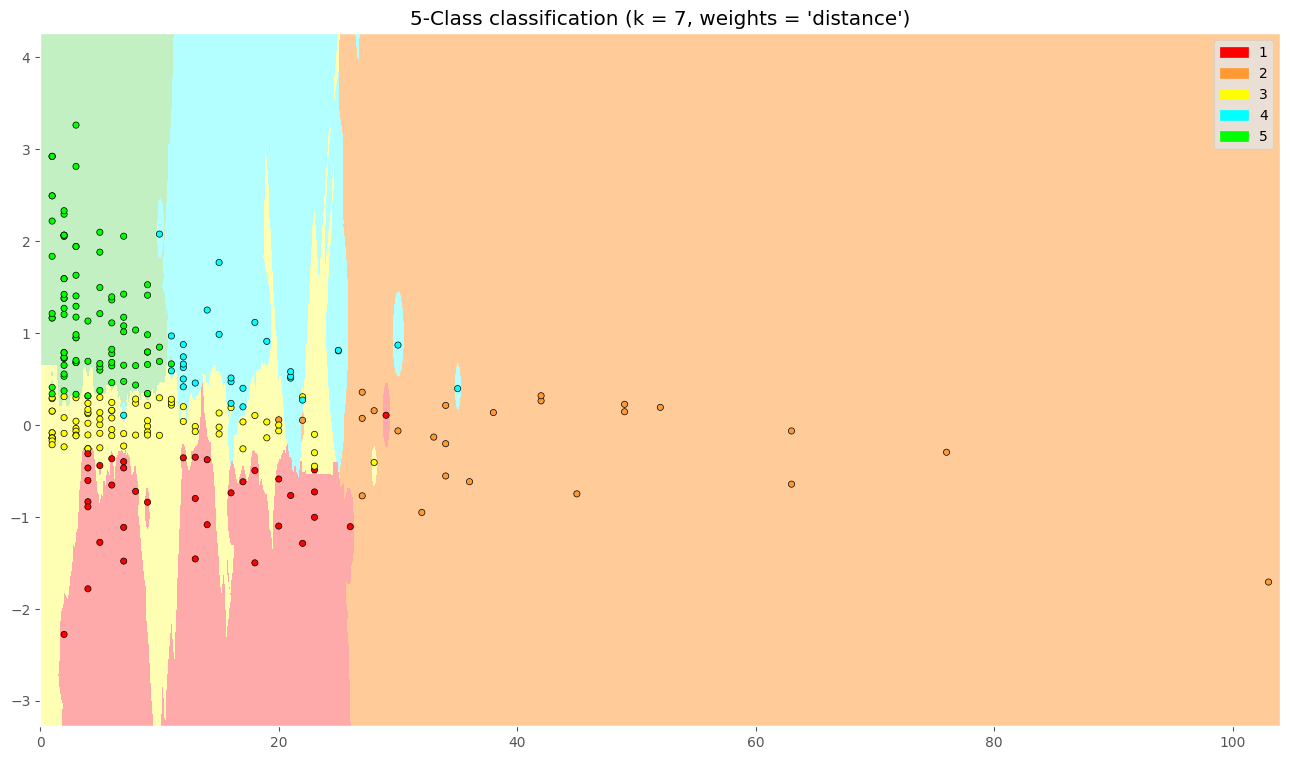

In [26]:
h = .02  # tamaño de paso en la malla



# Creacíon de mapas de colores
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2']) # colores para los puntos
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])   # colores para las áreas

# se crea una instancia del clasificador KNeighbors y se ajustan los datos
weights = 'distance'
clf = KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X, y)


# Graficamos los límites de decisión. Para ello, asignaremos un color a cada
# punto de la malla [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Colocamos el resultado en un gráfico de colores
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


# Se grafican los puntos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Se crean las etiquetas para la leyenda
patch0 = mpatches.Patch(color='#FF0000', label='1') 
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])

# Se coloca el título y las etiquetas de los ejes
plt.title("5-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.show()

Vemos las 5 zonas en las que se relacionan cantidad de palabras con el valor de sentimiento de la Review que deja el usuario.

Se distinguen 5 regiones que podríamos dividir así:

 <img width="1200" height="600" src="img/knn-clasification-sectores.png" >   

Así pues, de un vistazo podemos decir una review de 20 palabras y Sentimiento 1, nos daría una valoración de 4 (zona azul).

Con estas zonas podemos intuir ciertas características de los usuarios que usan y valoran la app:

- Los usuarios que ponen 1 estrella tienen sentimiento negativo y hasta 25 palabras.(RECUADRO ROJO)
- Los usuarios que ponen 2 estrellas dan muchas explicaciones (hasta 100 palabras) y su sentimiento puede variar entre negativo y algo positivo.(RECUADRO NARANJA)
- Los usuarios que ponen 3 estrellas son bastante neutrales en sentimientos, puesto que están en torno al cero y hasta unas 25 palabras.(RECUADRO AMARILLO)
- Los usuarios que dan 5 estrellas son bastante positivos (de 0,5 en adelante, aproximadamente) y ponen pocas palabras (hasta 10).(RECUADRO VERDE)


## Elegir el mejor valor de **k**(sobre todo importante para desempatar o elegir los puntos frontera!)   

Hemos visto que asignamos el valor n_neighbors=7 como valor de “k” y se ha obtenido buenos resultados. 

¿De donde salió ese valor?. Podemos ejecutar el código que viene a continuación, donde vemos distintos valores k y la precisión obtenida.


([<matplotlib.axis.XTick at 0x7f10e9118090>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

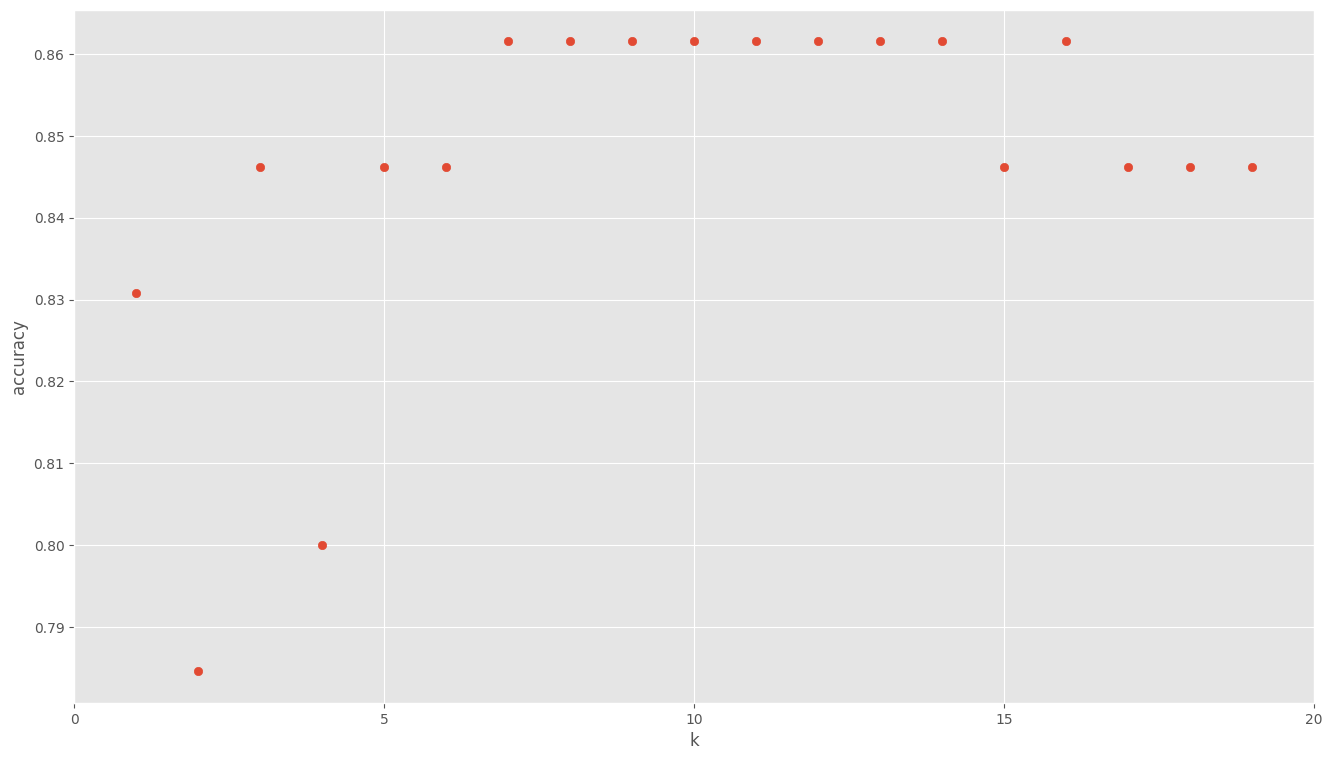

In [27]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

En la gráfica vemos que con valores k=7 a k=14 es donde mayor precisión se logra.

## Clasificar y/o Predecir nuevas muestras   

Ya tenemos nuestro modelo y nuestro valor de k. Supongamos que nos llegan nuevas reviews! veamos como predecir sus estrellas de 2 maneras. La primera:

In [28]:
print(clf.predict([[5, 1.0]]))

[5]



Este resultado nos indica que para 5 palabras y sentimiento 1, nos valorarán la app con 5 estrellas.

Pero también podríamos obtener las probabilidades que de nos den 1, 2,3,4 o 5 estrellas con predict_proba():

In [29]:
print(clf.predict_proba([[20, 0.0]]))

[[0.00381998 0.02520212 0.97097789 0.         0.        ]]


En esta ocasión, vemos que para las coordenadas 20, 0.0 hay 97% probabilidades que nos den 3 estrellas.    
Se puede comprobar en el gráfico anterior, que encajan en las zonas que delimitamos anteriormente.